# Øving 7 TMA4135 Lars Ankile

### Oppgave 1 b)

In [10]:
%matplotlib inline

from numpy import *
from matplotlib.pyplot import *
from math import factorial
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
rcParams.update(newparams)

In [11]:
# Polynomet jeg fant i a)
def polynomial_1(x):
    return 2*(x**2) + 3/2*x -1

# Hjelpefunksjon som lager korresponderende y til x-ene
def create_y_points(xs):
    points = []
    for x in xs:
        points.append(polynomial_1(x))
    return points

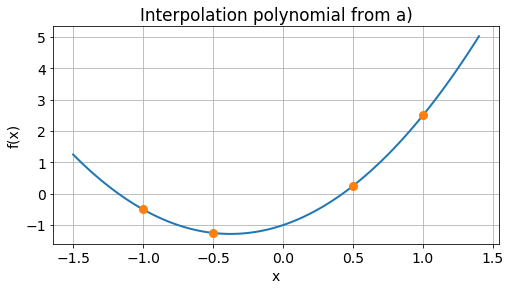

In [12]:
x = linspace(-1.5, 1.4, 101)
p = create_y_points(x)
plot(x, p)

xdata = [-1, -1/2, 1/2, 1]
ydata = [-1/2, -5/4, 1/4, 5/2]

plot(xdata, ydata, 'o')
title('Interpolation polynomial from a)')
xlabel('x')
ylabel('f(x)');

Observerer at polynomet jeg kom frem til i `a)` går gjennom de 4 punktene.

### Oppgave 1 c)

In [13]:
def cardinal(xdata, x):
    """
    cardinal(xdata, x): 
    In: xdata, array with the nodes x_i.
        x, array or a scalar of values in which the cardinal functions are evaluated.
    Return: l: a list of arrays of the cardinal functions evaluated in x. 
    """
    n = len(xdata)              # Number of evaluation points x
    l = []
    for i in range(n):          # Loop over the cardinal functions
        li = ones(len(x))
        for j in range(n):      # Loop to make the product for l_i
            if i is not j:
                li = li*(x-xdata[j])/(xdata[i]-xdata[j])
        l.append(li)            # Append the array to the list            
    return l

def lagrange(ydata, l):
    """
    lagrange(ydata, l):
    In: ydata, array of the y-values of the interpolation points.
         l, a list of the cardinal functions, given by cardinal(xdata, x)
    Return: An array with the interpolation polynomial. 
    """
    poly = 0                        
    for i in range(len(ydata)):
        poly = poly + ydata[i]*l[i]  
    return poly

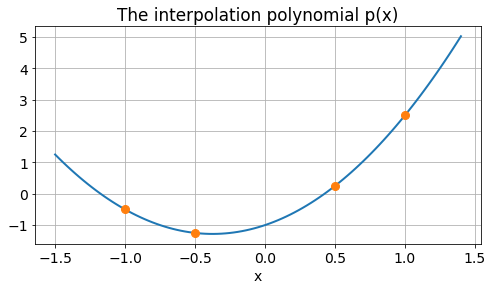

In [14]:
xdata = [-1, -1/2, 1/2, 1]
ydata = [-1/2, -5/4, 1/4, 5/2]

x = linspace(-1.5, 1.4, 101)
l = cardinal(xdata, x) 
p = lagrange(ydata, l)

plot(x, p)             
plot(xdata, ydata, 'o')

title('The interpolation polynomial p(x)')
xlabel('x');

Den ser farlig lik ut den grafen over der som den forrige. Kult.


### Oppgave 2 a)

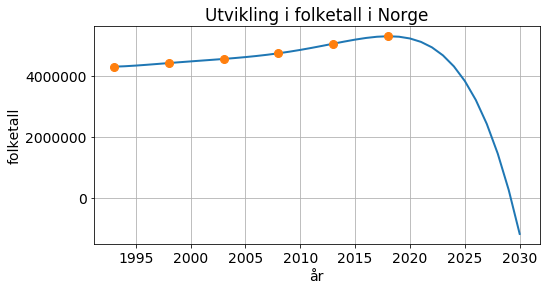

In [15]:
xdata = [   1993,    1998,    2003,    2008,    2013,    2018]
ydata = [4299167, 4417599, 4552252, 4737171, 5051275, 5295619]

start, end = 1993, 2030
interval = end - start + 1

x = linspace(start, end, interval)

l = cardinal(xdata, x)
p = lagrange(ydata, l)


plot(x, p)
plot(xdata, ydata, 'o')

title('Utvikling i folketall i Norge')
xlabel('år')
ylabel('folketall');



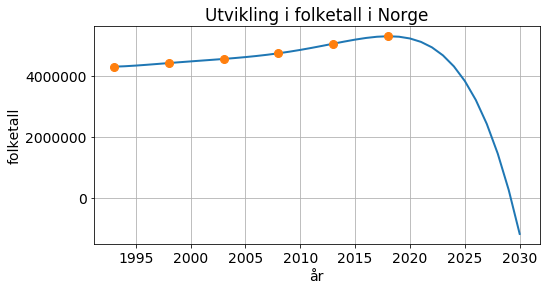

In [16]:
xdata = [   1993,    1998,    2003,    2008,    2013,    2018]
ydata = [4299167, 4417599, 4552252, 4737171, 5051275, 5295619]

start, end = 1993, 2030
interval = end - start + 1

x = linspace(start, end, interval)

l = cardinal(xdata, x)
p = lagrange(ydata, l)


plot(x, p)
plot(xdata, ydata, 'o')

title('Utvikling i folketall i Norge')
xlabel('år')
ylabel('folketall');

In [18]:
def predict_population(year):
    return f'I {year}, er det omtrent {int(round(p[year - start]))} mennesker i Norge.'

for n in [0, 10, 25, 30]:
    print(predict_population(2000 + n))

I 2000, er det omtrent 4472372 mennesker i Norge.
I 2010, er det omtrent 4848757 mennesker i Norge.
I 2025, er det omtrent 3829736 mennesker i Norge.
I 2030, er det omtrent -1174984 mennesker i Norge.


#### Konklusjon
Det ser ut til at interpolasjonen er god i både 2000 og 2010, selv om den selvfølgelig avviker noe (estimert 4472372, men var 4478497 i 2000 og estimert 4848757, men var 4858199 i 2010.

Den prediktive kraften til interpolasjonen min er det dessverre verre med. Jeg anser det som lite sannsynlig at folketallet i Norge stuper kraftig rundt 2020, og ser det som enda mindre sannsynlig at vi får negativt folketall innen 2030.

### Oppgave 3 c)

Funksjonsdefinisjon og intervall

In [ ]:
def f(x):
    return x**2 * cos(x)

# Set the interval 
a = -1
b = 2
x = linspace(a, b, 101)

#### Interpolasjonspolynom og feil for jevnt fordelte noder

In [ ]:
# Setter interpolasjonspunktene
n = 3
xdata = linspace(a, b, n + 1)     
ydata = f(xdata)                

# Evaluerer interpolasjonspolynomet i x-punktene
l = cardinal(xdata, x)  
p = lagrange(ydata, l)

# Plotter f(x) og p(x) and interpolasjonspunktene
subplot(2,1,1)                  
plot(x, f(x), x, p, xdata, ydata, 'o')
legend(['f(x)','p(x)'])
grid(True)

# Plotter interpolasjonsfeilen
subplot(2,1,2)
plot(x, (f(x)-p))
xlabel('x')
ylabel('Error: f(x)-p(x)')
grid(True)
print(f"Max error is {round(max(abs(p - f(x))), 3)}")

Ser av grafene ovenfor at polynomet gir et ganske godt estimat av funksjonen, men bommer en god del i intervallet `[-1, 0]`. Den kalkulerte maksimale feilen er `0.35`, noe som er godt innenfor den teoretiske feilen jeg kom frem til på `0.75`. Synes kanskje avviket her er noe høyt.

#### Interpolasjonspolynom og feil for Chebyshevpunkter

In [ ]:
# Setter interpolasjonspunktene
xdata = array([-0.89, -0.07, 1.07, 1.89])
ydata = f(xdata)

# Evaluerer interpolasjonspolynomet i x-punktene
l = cardinal(xdata, x)  
p = lagrange(ydata, l)

# Plotter f(x) og p(x) and interpolasjonspunktene
subplot(2, 1, 1)                  
plot(x, f(x), x, p, xdata, ydata, 'o')
legend(['f(x)', 'p(x)'])
grid(True)

# Plotter interpolasjonsfeilen
subplot(2,1,2)
plot(x, (f(x)-p))
xlabel('x')
ylabel('Error: f(x) - p(x)')
grid(True)
print(f"Max error is {round(max(abs(p - f(x))), 3)}")

Denne gangen gir interpolasjonspolynomet et bedre estimat av funksjonen, noe som var å forvente. Den kalkulerte feilen var på `0.23`, noe som er ca 30% bedre enn den maksimale feilen for jevnt fordelte noder. Den teoretiske maksimale feilen ble `0.3164`, så vi ligger godt innenfor dette også.

### Oppgave 3 d)

In [ ]:
def chebyshev_nodes(a, b, n):
    i = array(range(n))
    x = cos((2*i+1)*pi/(2*(n)))
    return 0.5*(b-a)*x+0.5*(b+a)

#### Tester med *jevnt fordelte* noder for n = 5, 10, 15 og 20

In [ ]:
for n in range(5, 20 + 1, 5):
    
    # Setter interpolasjonspunktene
    xdata = linspace(a, b, n + 1)
    ydata = f(xdata)

    # Evaluerer interpolasjonspolynomet i x-punktene
    l = cardinal(xdata, x)  
    p = lagrange(ydata, l)

    print(f"Max error for n: {n} is {max(abs(p - f(x))):.2e}")

Ser at feilen faller dramatisk når man dobler n.

#### Tester med *Chebyshevpunkter* for n = 5, 10, 15 og 20

In [ ]:
for n in range(5, 20 + 1, 5):
    
    # Setter interpolasjonspunktene
    xdata = chebyshev_nodes(a, b, n + 1)
    ydata = f(xdata)

    # Evaluerer interpolasjonspolynomet i x-punktene
    l = cardinal(xdata, x)  
    p = lagrange(ydata, l)

    print(f"Max error for n: {n} is {max(abs(p - f(x))):.2e}")

Også her faller feilen dramatisk med økende n, men med Chebyshevpunkter faller feilen betydelig fortere. Det er jo ikke feil.